- Larsim sim, qd und precip vs Sedfracht
- Topographical Index
- Slope


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

C:\Anaconda3\envs\py27\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
import scipy.stats as stats

In [4]:
from scipy.stats import spearmanr

In [5]:
from pandas.tools.plotting import scatter_matrix

In [6]:
%matplotlib inline

In [7]:
pfad_schwebstoffe_AT = u'd:/Projekte/Innprojekt/Data/Schwebstoffe/AT/Österreich_Schwebstoffe/Österreich/'

In [8]:
pfad_zonalstat_xls = u'S:/GIS/EZGs_Inn/AlleEZGsZonalStat/xls/'

In [9]:
pfad_schwebstoffe_by = u'D:/Projekte/Innprojekt/Data/Schwebstoffe/BY/Neu bis 04-2016/'

In [10]:
pfad_schwebstoffe_AT_NEU = 'd:/Projekte/Innprojekt/Data/Schwebstoffe/AT/Aktuell_2016_04/'
print pfad_schwebstoffe_AT

d:/Projekte/Innprojekt/Data/Schwebstoffe/AT/Österreich_Schwebstoffe/Österreich/


In [11]:
pfad_zonalstat_mitlandeck2 = u'S:/GIS/EZGs_Inn/AlleEZGsZonalStat/mitlandeck2/'

## Neu mit Jahren 2012, 2013:

In [12]:
alles_excel4 = pd.read_csv(pfad_zonalstat_mitlandeck2+'25m_inn_alles_jahre_ohnelaufen.csv', header=0, delimiter=';', decimal=',')

#alles_wofracht4 = alles_excel4[np.isfinite(alles_excel4['MeanJahresfracht'])]

#alles_wofracht4 = alles_wofracht4.set_index('SOURCE')

alles_fracht4 = alles_excel4.ix[:,1:]

alles_fracht4.insert(4, 't_ha_a', alles_fracht4['MeanJahresfracht'] / alles_fracht4['area'] * 10000)

alles_fracht4

,SOURCE,geo,jahr,MeanJahresfracht,t_ha_a,area,area_km2,MeanElev,MeanSlope,MeanElevabvstream,...,MeanConvexCurvature,MeanRusle,SumRusle,MeanRfaktor,MaxRfaktor,MeanCfaktor,TWI,TRI,STI,StreamPowerIndex
0,Landeck,alpine,allYears,0.166,2.283566e-06,726933125,726.933125,2123.673242,26.627967,439.183881,...,-9.750090,28.592025,1.735250e+06,835.941913,1560.926270,0.083019,3.029584,11.467255,9.178150,84.299729
1,Vent,alpine,allYears,0.163,1.687938e-05,96567500,96.567500,2887.428578,22.489512,390.869675,...,-8.726377,79.769496,1.920052e+05,1044.709020,2022.085083,0.165619,3.347160,9.435113,7.869009,38.360710
2,Tumpen,alpine,allYears,0.638,8.155452e-06,782298750,782.298750,2424.337855,27.383050,460.902954,...,-9.663693,43.537961,1.900693e+06,1003.093102,2084.063477,0.106851,3.050943,11.959445,9.683437,93.391776
3,InnsbruckInn,alpine,allYears,1.837,3.184997e-06,5767666875,5767.666875,1705.586437,24.993953,430.059712,...,-9.224497,18.650088,2.315427e+06,918.081659,1943.434326,0.067400,3.252673,10.890207,9.006531,669.999918
4,InnsbruckReichenau,alpine,allYears,0.171,2.019598e-06,846703125,846.703125,1897.836713,26.084500,443.923989,...,-9.314707,19.134183,1.352595e+06,891.561326,1852.067383,0.062262,3.120214,11.284753,9.114773,90.101296
5,Hart,alpine,allYears,0.219,2.016039e-06,1086288750,1086.288750,1920.645564,26.668147,499.350499,...,-9.239076,20.506329,1.760079e+06,878.203154,1884.060791,0.061827,3.172926,11.568549,9.722165,74.166629
6,Bruckhaeusl,alpine,allYears,0.128,4.048223e-06,316188125,316.188125,1330.509948,20.816758,333.987701,...,-7.539220,4.357656,1.353837e+05,757.044738,988.054138,0.028186,3.411895,8.548677,7.086887,41.783799
7,Rattenberg,alpine,allYears,2.400,2.828733e-06,8484363125,8484.363125,1331.785201,21.456309,376.476356,...,-8.212647,9.964830,6.828898e+05,840.250678,1623.069824,0.054290,3.469380,9.148178,7.552757,590.411857
8,Oberaudorf,foreland w alpine influence,allYears,1.935,1.999036e-06,9679665000,9679.665000,1056.596923,20.236305,271.815255,...,-9.045264,2.735446,2.245063e+05,794.807895,1025.533813,0.024837,3.317586,8.594309,6.479699,1016.005354
9,Rosenheim,foreland w alpine influence,allYears,2.392,2.354598e-06,10158848125,10158.848130,714.264693,11.094576,133.632489,...,-6.925468,1.761200,7.824836e+04,849.343460,1028.585083,0.039261,4.170359,4.615454,3.209474,866.313750


In [13]:
jahre_subset = alles_fracht4[['geo', 'jahr', 'MeanJahresfracht', 't_ha_a', 'area_km2', 'MeanElev', 'MeanSlope', 
                                'MeanDist2stream', 'SumRusle', 'MaxRfaktor', 'MeanCfaktor', 'StreamPowerIndex']]

In [23]:
jahre_subset.index = alles_fracht4['SOURCE']

In [78]:
rusle_test = jahre_subset[['jahr', 'geo', 'MeanJahresfracht', 'SumRusle']]

In [31]:
rusle_allyears = rusle_test[rusle_test['jahr'] == 'allYears']

In [35]:
sns.set(style='white')

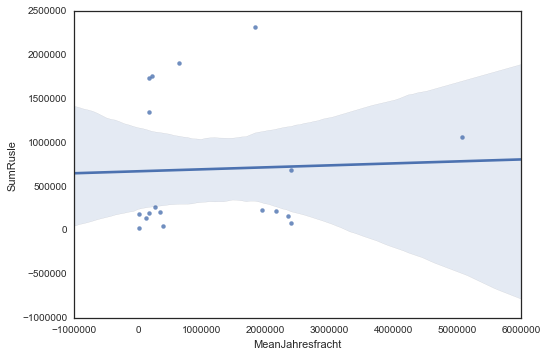

In [40]:
plt.figure(dpi=300)
sns.regplot(rusle_allyears['MeanJahresfracht']*1000000, rusle_allyears['SumRusle'], data=rusle_allyears)
plt.savefig('rusle_test.png')

In [49]:
sns.lmplot(x=rusle_test['MeanJahresfracht']*1000000, y=rusle_test['SumRusle'], data=rusle_test, col='years')

ValueError: all the input arrays must have same number of dimensions

In [51]:
rusle_test_t = rusle_test

In [61]:
rusle_test.loc[:,'MeanJahresfracht']

SOURCE
Landeck                 166000.0
Vent                    163000.0
Tumpen                  638000.0
InnsbruckInn           1837000.0
InnsbruckReichenau      171000.0
Hart                    219000.0
Bruckhaeusl             128000.0
Rattenberg             2400000.0
Oberaudorf             1935000.0
Rosenheim              2392000.0
Wasserburg             2163000.0
Koessen                 336000.0
Staudach                382000.0
Unterjettenberg         259000.0
Linden                   15000.0
Postmuenster             12000.0
Schaerding             5080000.0
Passau                 2343000.0
Landeck                 159000.0
Vent                     26000.0
Tumpen                  922000.0
InnsbruckInn           2304000.0
InnsbruckReichenau      378000.0
Hart                    418000.0
Bruckhaeusl             123000.0
Rattenberg             3177000.0
Oberaudorf             2263000.0
Rosenheim              2619000.0
Wasserburg             2499000.0
Koessen                 254000.0
Sta

In [63]:
rusle_test_t.loc[:,'MeanJahresfracht'] = rusle_test.loc[:,'MeanJahresfracht'] * 1000000

C:\Anaconda3\envs\py27\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [67]:
rusle_test_t['MeanJahresfracht'] = 0

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
rusle_test_t.loc[:,'MeanJahresfracht'] = rusle_test['MeanJahresfracht'] * 1000000

In [79]:
rusle_test

,jahr,geo,MeanJahresfracht,SumRusle
SOURCE,,,,
Landeck,allYears,alpine,0.166,1.735250e+06
Vent,allYears,alpine,0.163,1.920052e+05
Tumpen,allYears,alpine,0.638,1.900693e+06
InnsbruckInn,allYears,alpine,1.837,2.315427e+06
InnsbruckReichenau,allYears,alpine,0.171,1.352595e+06
Hart,allYears,alpine,0.219,1.760079e+06
Bruckhaeusl,allYears,alpine,0.128,1.353837e+05
Rattenberg,allYears,alpine,2.400,6.828898e+05
Oberaudorf,allYears,foreland w alpine influence,1.935,2.245063e+05


In [81]:
rusle_test_t

,jahr,geo,MeanJahresfracht,SumRusle
SOURCE,,,,
Landeck,allYears,alpine,166000.0,1.735250e+06
Vent,allYears,alpine,163000.0,1.920052e+05
Tumpen,allYears,alpine,638000.0,1.900693e+06
InnsbruckInn,allYears,alpine,1837000.0,2.315427e+06
InnsbruckReichenau,allYears,alpine,171000.0,1.352595e+06
Hart,allYears,alpine,219000.0,1.760079e+06
Bruckhaeusl,allYears,alpine,128000.0,1.353837e+05
Rattenberg,allYears,alpine,2400000.0,6.828898e+05
Oberaudorf,allYears,foreland w alpine influence,1935000.0,2.245063e+05


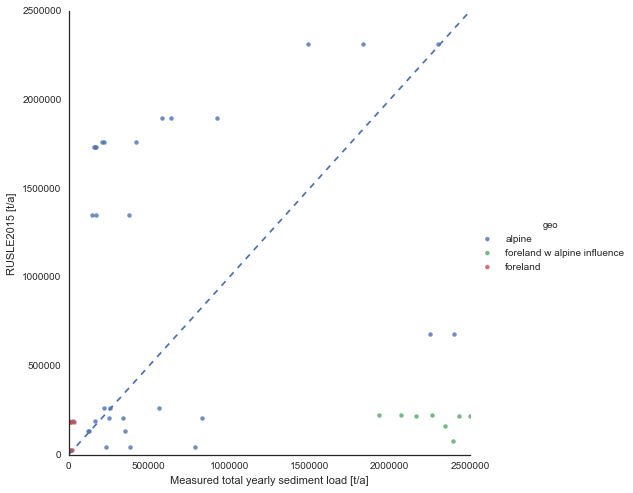

In [93]:
t = sns.lmplot(x='MeanJahresfracht', y='SumRusle', data=rusle_test_t, hue='geo', legend_out=True,size=7, fit_reg=False)
#sns.jointplot  stat_func=spearmanr, 
#sns.regplot(x='MeanJahresfracht', y='SumRusle', data=rusle_test_t, scatter=False, ax=t.axes[0,0])
#t.annotate(stats.spearmanr)
#t.fig.text(.5, .5, str(spearmanr(scatter_subset['MeanCfaktor'], scatter_subset['t_ha_a'])), ha ='left', fontsize = 15)
plt.plot([0,25000000], [0,25000000], linestyle='--')
plt.xlim(0,2500000)
plt.ylim(0,2500000)
plt.ylabel('RUSLE2015 [t/a]')
plt.xlabel('Measured total yearly sediment load [t/a]')
plt.savefig('rusle_test_geo.pdf')

In [ ]:
%ls

In [94]:
from sklearn import cluster, datasets

In [96]:
rusle_data = rusle_test_t['SumRusle'].reshape(-1,1)

In [100]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(rusle_data) 
cluster.KMeans(copy_x=True, init='k-means++')

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [101]:
print k_means.labels_ 

[1 0 1 1 2 1 0 2 0 0 0 0 0 0 0 0 2 0 1 0 1 1 2 1 0 2 0 0 0 0 0 0 0 0 2 0 1
 0 1 1 2 1 0 2 0 0 0 0 0 0 0 0 2 0]


In [102]:
k_means

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [57]:
iris = datasets.load_iris()
>>> X_iris = iris.data
>>> y_iris = iris.target


KMeans(copy_x=True, init='k-means++', ...
>>> print(k_means.labels_[::10])
[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
>>> print(y_iris[::10])
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]

 Datentr„ger in Laufwerk D: ist Data
 Volumeseriennummer: EC61-86BD

 Verzeichnis von D:\Projekte\Innprojekt\GitHub\development\analysis

28.04.2016  09:19    <DIR>          .
28.04.2016  09:19    <DIR>          ..
14.04.2016  11:44    <DIR>          .ipynb_checkpoints
04.12.2015  18:53            38.632 eCDF_plot_slope_inn_100vs25.ipynb
03.12.2015  17:59             7.793 errlib.py
08.07.2015  12:04             1.289 event_selection.py
25.11.2015  12:52            24.594 grass_test.ipynb
16.09.2015  11:46             1.479 grass_test.py
04.12.2015  11:57         8.594.865 Guete_larsim2000_2003_BIAS_5classes_map.png
04.12.2015  11:59         8.684.458 Guete_larsim2000_2003_NSE_map.png
03.12.2015  00:26         7.051.413 Guete_pegelliste_big_clip.jpg
02.03.2016  11:23             5.417 larsim csv import df column tests.ipynb
14.04.2016  14:32           129.979 larsim_eobs_vs_arcgis_eobs.ipynb
07.03.2016  15:14           259.826 Larsim_Guete.ipynb
07.03.2016  12:10           748.464 Lars

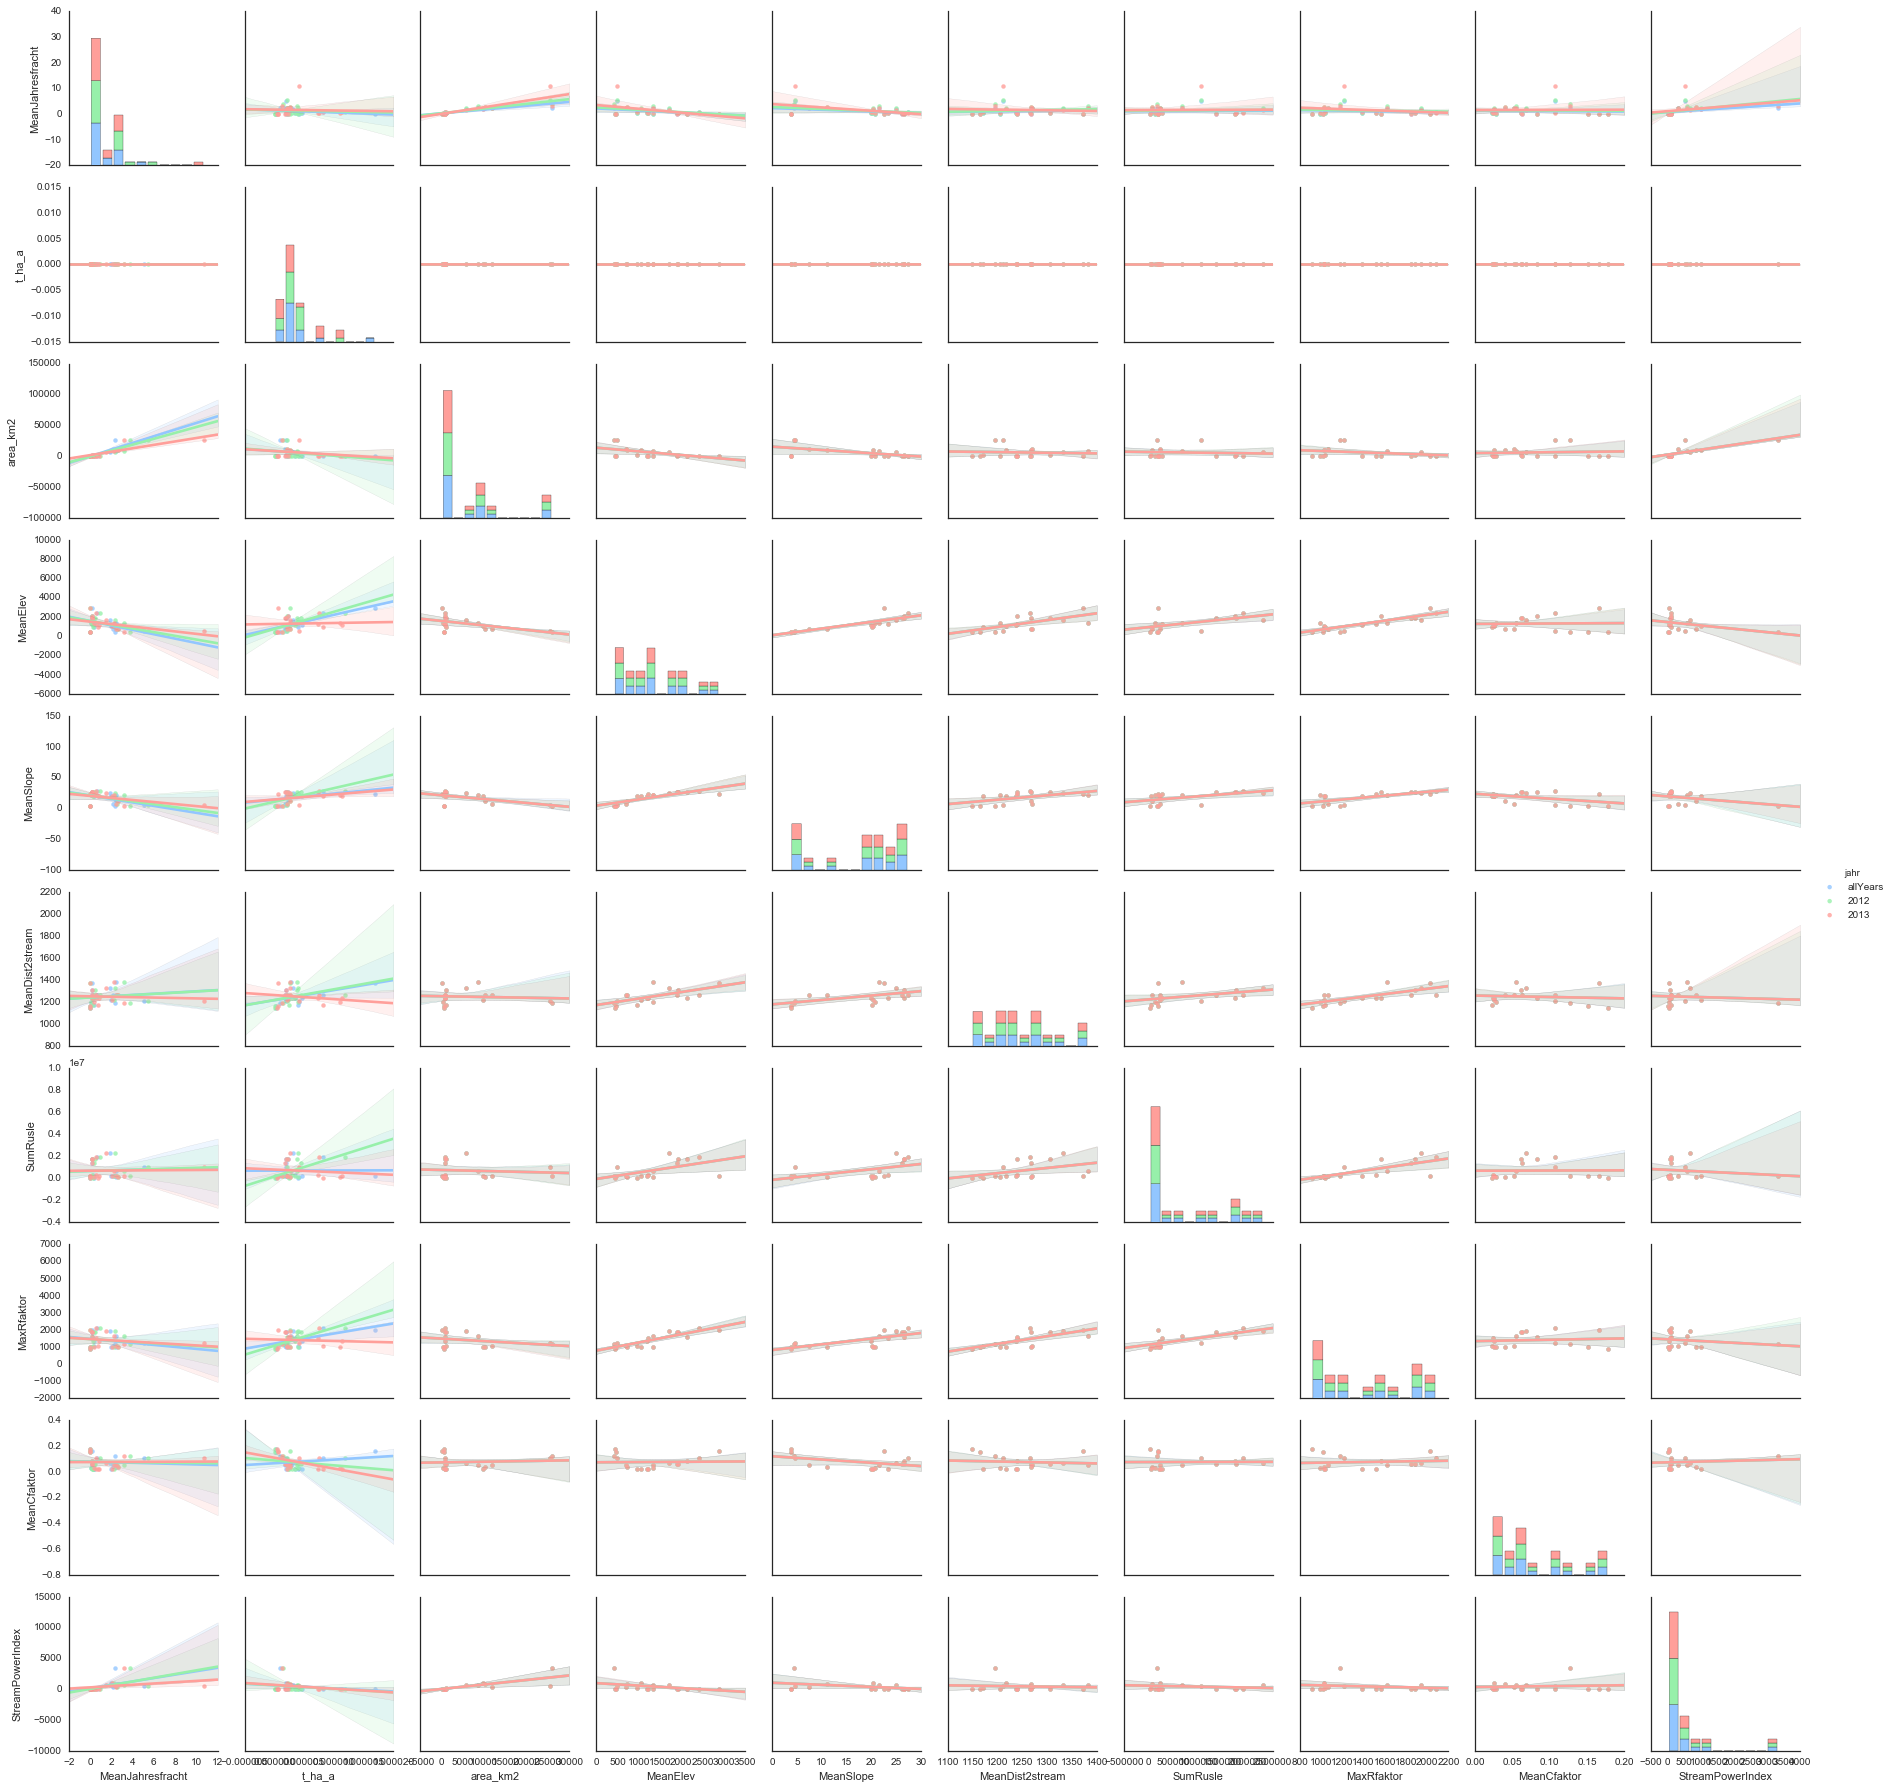

In [188]:
j = sns.pairplot(jahre_subset, kind='reg', hue='jahr')
plt.savefig('sns_pairplot_subset_jahre.png')

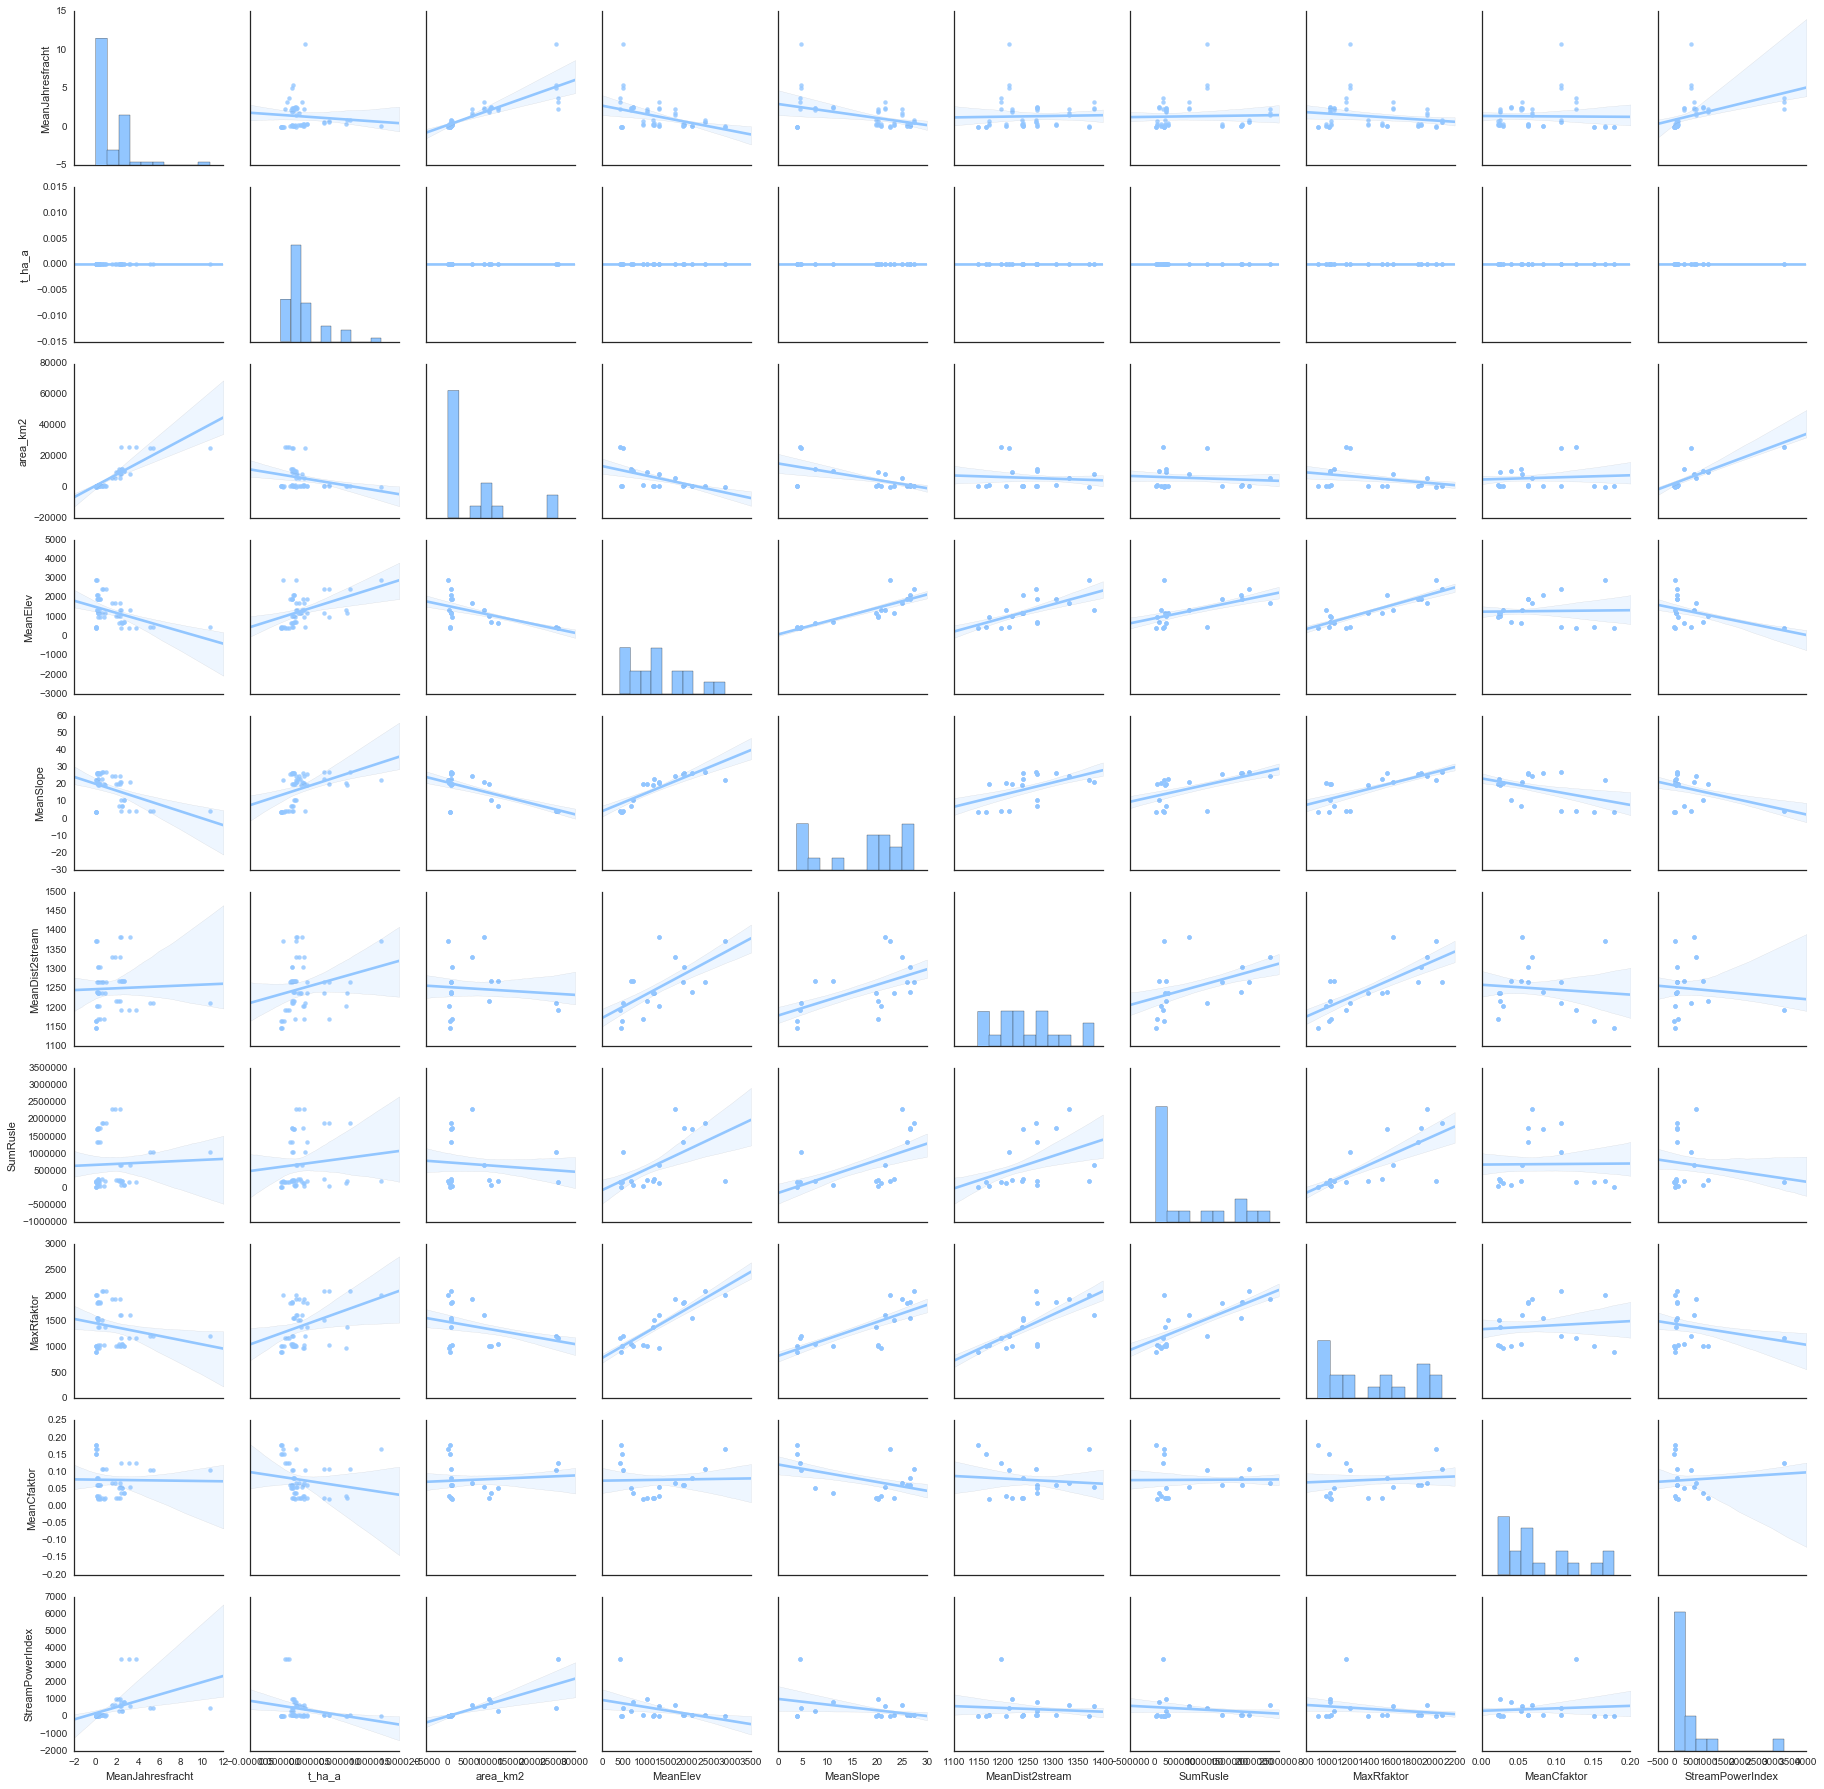

In [189]:
j = sns.pairplot(jahre_subset, kind='reg')#, hue='jahr')
plt.savefig('sns_pairplot_subset_jahre_ohnehue.png')

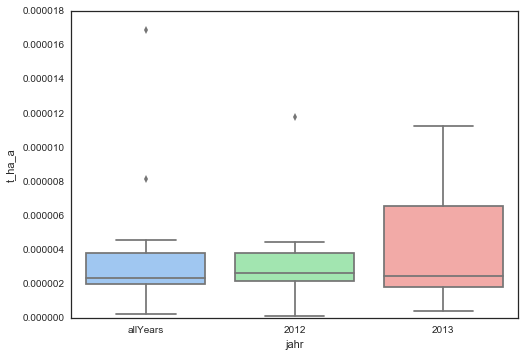

In [190]:
sns.boxplot(x='jahr', y='t_ha_a', data=jahre_subset)

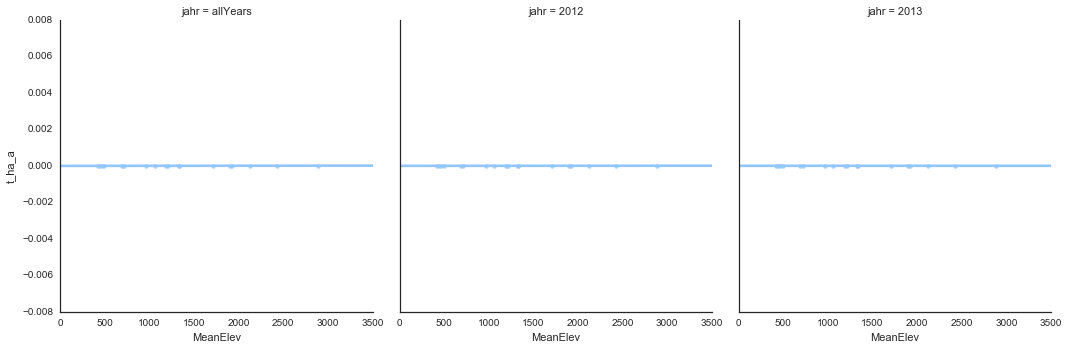

In [193]:
sns.lmplot(x='MeanElev', y='t_ha_a', data=alles_fracht4, col='jahr')

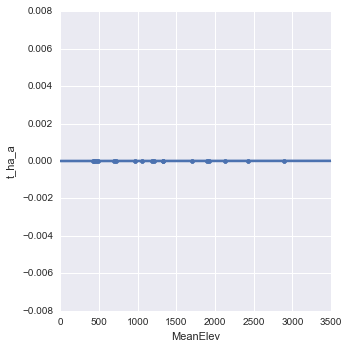

In [200]:
sns.regplot(x='MeanElev', y='t_ha_a', data=jahre_subset)

In [ ]:
subsubset_jahre = jahre_subset[['t_ha_a','jahr','MeanSlope', 'SumRusle', 'MaxRfaktor', 'MeanCfaktor']]

In [ ]:
sns.regplot()

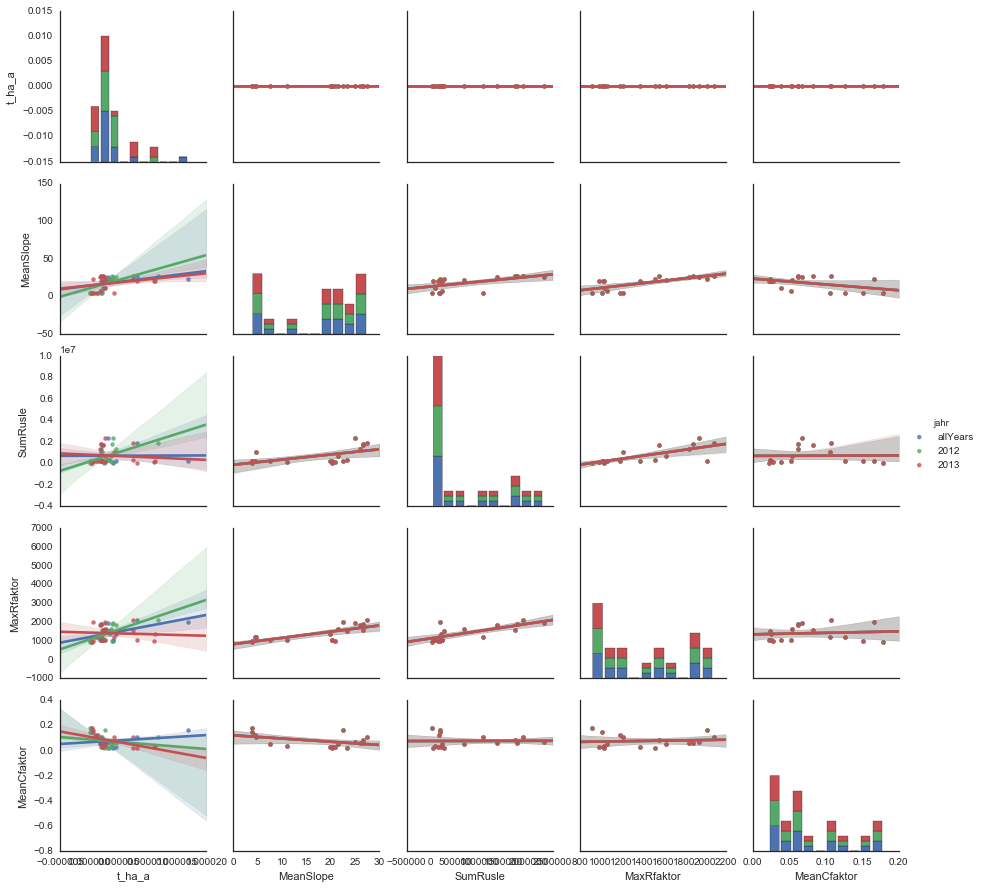

In [228]:
sns.pairplot(subsubset_jahre, kind='reg', hue='jahr')
plt.savefig('pairplot_subsubset_jahre.png')

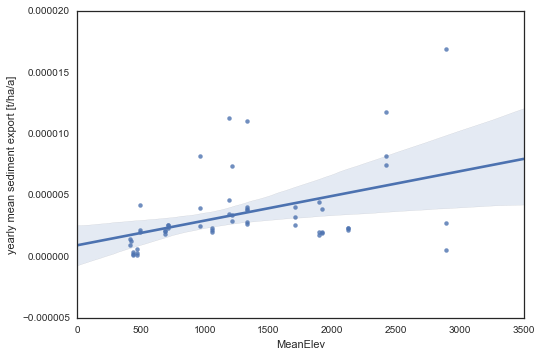

In [211]:
sns.set(style='white')
sns.regplot(x='MeanElev', y='t_ha_a', data=jahre_subset, x_jitter=.1)
plt.ylabel('yearly mean sediment export [t/ha/a]')

## Ende Einschub Jahre.

In [14]:
alles_excel3 = pd.read_csv(pfad_zonalstat_mitlandeck2+'25m_inn_alles_mitlandeck2_geo.csv', header=0, delimiter=';', decimal=',')

alles_wofracht3 = alles_excel3[np.isfinite(alles_excel3['MeanJahresfracht'])]

alles_wofracht3 = alles_wofracht3.set_index('SOURCE')

alles_fracht3 = alles_wofracht3.ix[:,1:]

alles_fracht3.insert(2, 't_ha_a', alles_fracht3['MeanJahresfracht'] / alles_fracht3['area'] * 10000)

alles_fracht3

,geo,MeanJahresfracht,t_ha_a,area,area_km2,MeanElev,MeanSlope,MeanElevabvstream,MeanDist2stream,MeanProfileCurvature,...,MeanConvexCurvature,MeanRusle,SumRusle,MeanRfaktor,MaxRfaktor,MeanCfaktor,TWI,TRI,STI,StreamPowerIndex
SOURCE,,,,,,,,,,,,,,,,,,,,,
landeck_br2_ezg,alpine,1.660114e+05,2.283723,726933125,726.933125,2123.673242,26.627967,439.183881,1239.873044,0.711152,...,-9.750090,28.592025,1.735250e+06,835.941913,1560.926270,0.083019,3.029584,11.467255,9.178150,84.299729
vent_pegel_ezg,alpine,1.630103e+05,16.880454,96567500,96.567500,2887.428578,22.489512,390.869675,1373.001479,0.559854,...,-8.726377,79.769496,1.920052e+05,1044.709020,2022.085083,0.165619,3.347160,9.435113,7.869009,38.360710
tumpen_ezg,alpine,6.384907e+05,8.161725,782298750,782.298750,2424.337855,27.383050,460.902954,1265.135122,0.702420,...,-9.663693,43.537961,1.900693e+06,1003.093102,2084.063477,0.106851,3.050943,11.959445,9.683437,93.391776
innsinn_ezg,alpine,1.836895e+06,3.184814,5767666875,5767.666875,1705.586437,24.993953,430.059712,1332.470248,0.608900,...,-9.224497,18.650088,2.315427e+06,918.081659,1943.434326,0.067400,3.252673,10.890207,9.006531,669.999918
innsreich_ezg,alpine,1.713832e+05,2.024124,846703125,846.703125,1897.836713,26.084500,443.923989,1267.542123,0.558058,...,-9.314707,19.134183,1.352595e+06,891.561326,1852.067383,0.062262,3.120214,11.284753,9.114773,90.101296
hartzill_ezg,alpine,2.187837e+05,2.014048,1086288750,1086.288750,1920.645564,26.668147,499.350499,1306.333751,0.505764,...,-9.239076,20.506329,1.760079e+06,878.203154,1884.060791,0.061827,3.172926,11.568549,9.722165,74.166629
bruckh_ezg,alpine,1.275201e+05,4.033046,316188125,316.188125,1330.509948,20.816758,333.987701,1205.207540,0.462999,...,-7.539220,4.357656,1.353837e+05,757.044738,988.054138,0.028186,3.411895,8.548677,7.086887,41.783799
rattenb_ezg,alpine,2.399558e+06,2.828212,8484363125,8484.363125,1331.785201,21.456309,376.476356,1383.219354,0.496472,...,-8.212647,9.964830,6.828898e+05,840.250678,1623.069824,0.054290,3.469380,9.148178,7.552757,590.411857
rosenheim_ezg,foreland w alpine influence,2.392264e+06,2.354858,10158848125,10158.848130,714.264693,11.094576,133.632489,1267.881777,0.690159,...,-6.925468,1.761200,7.824836e+04,849.343460,1028.585083,0.039261,4.170359,4.615454,3.209474,866.313750


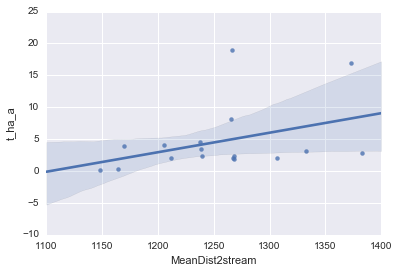

In [17]:
sns.regplot(x='MeanDist2stream', y='t_ha_a', data=alles_fracht3)

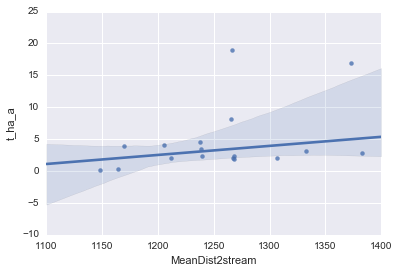

In [12]:
sns.regplot(x='MeanDist2stream', y='t_ha_a', data=alles_fracht2, robust=True)

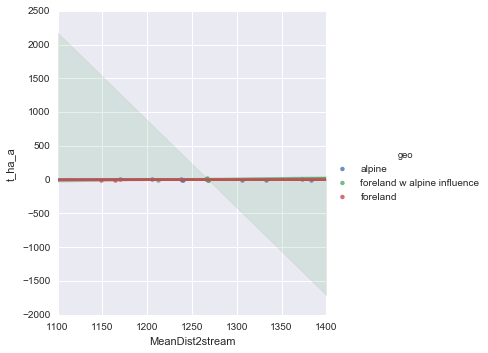

In [18]:
sns.lmplot(x='MeanDist2stream', y='t_ha_a', data=alles_fracht3, hue='geo')

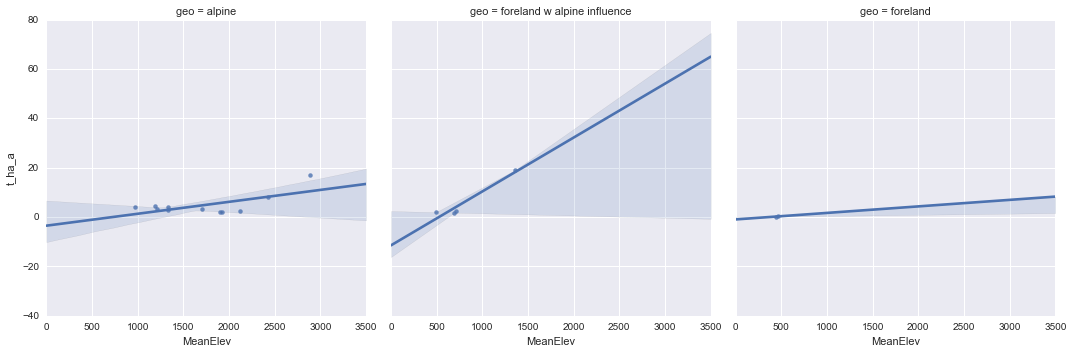

In [21]:
sns.lmplot(x='MeanElev', y='t_ha_a', data=alles_fracht3, col='geo')

In [22]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

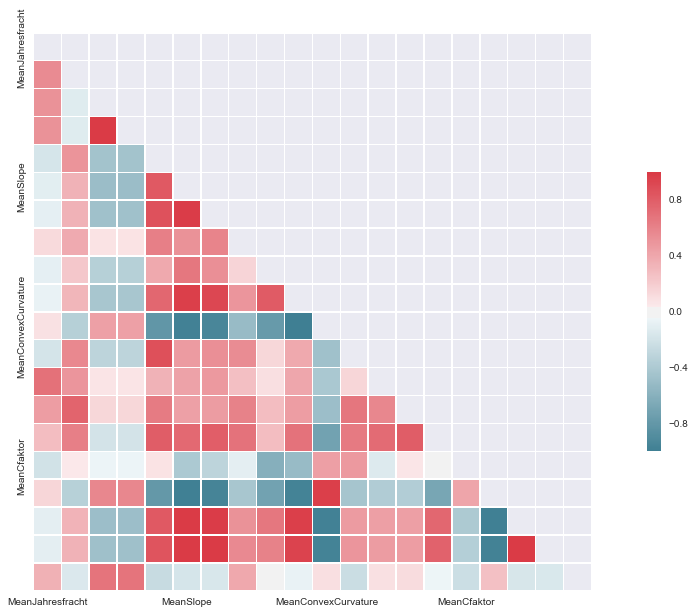

In [25]:
# Compute the correlation matrix
corr = alles_fracht3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [26]:
alles_fracht3.columns.values

array(['geo', 'MeanJahresfracht', 't_ha_a', 'area', 'area_km2', 'MeanElev',
       'MeanSlope', 'MeanElevabvstream', 'MeanDist2stream',
       'MeanProfileCurvature', 'MeanConcaveCurvature',
       'MeanConvexCurvature', 'MeanRusle', 'SumRusle', 'MeanRfaktor',
       'MaxRfaktor', 'MeanCfaktor', 'TWI', 'TRI', 'STI', 'StreamPowerIndex'], dtype=object)

In [36]:
scatter_subset = alles_fracht3[['geo', 'MeanJahresfracht', 't_ha_a', 'area_km2', 'MeanElev', 'MeanSlope', 
                                'MeanDist2stream', 'SumRusle', 'MaxRfaktor', 'MeanCfaktor', 'StreamPowerIndex']]

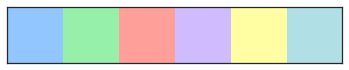

In [153]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [162]:
ezg_namen = ('Landeck', 'Vent', 'Tumpen', 'InnsbruckInn', 'InnsbruckSill', 'Hart', 'Bruckhaeusl', 'Rattenberg', 'Rosenheim', 'Wasserburg',
            'Koessen', 'Staudach', 'Unterjettenberg', 'Laufen', 'Linden', 'Postmuenster', 'Schaerding')

In [163]:
scatter_subset.index = ezg_namen

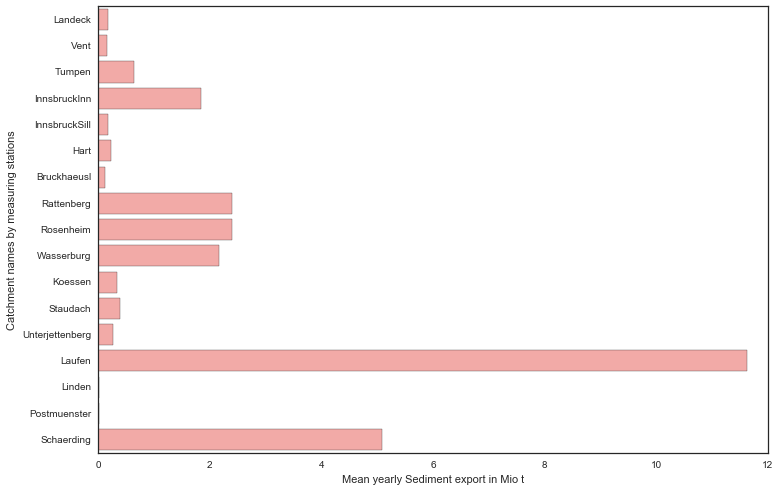

In [174]:
sns.set(style='white', palette='pastel')
plt.figure(figsize=(12,8))
fig = sns.barplot(x=scatter_subset['MeanJahresfracht']/1000000, y=scatter_subset.index, data=scatter_subset, color=current_palette[2])
ax.set_xlim(0,6)
plt.xlabel('Mean yearly Sediment export in Mio t')
plt.ylabel('Catchment names by measuring stations')
#fig.savefig('yearly_meansed_overview.svg', format='svg')

In [168]:
scatter_subset['MeanJahresfracht'] / 1000000

Landeck             0.166011
Vent                0.163010
Tumpen              0.638491
InnsbruckInn        1.836895
InnsbruckSill       0.171383
Hart                0.218784
Bruckhaeusl         0.127520
Rattenberg          2.399558
Rosenheim           2.392264
Wasserburg          2.163251
Koessen             0.336417
Staudach            0.381660
Unterjettenberg     0.259408
Laufen             11.618949
Linden              0.014528
Postmuenster        0.012126
Schaerding          5.079971
Name: MeanJahresfracht, dtype: float64

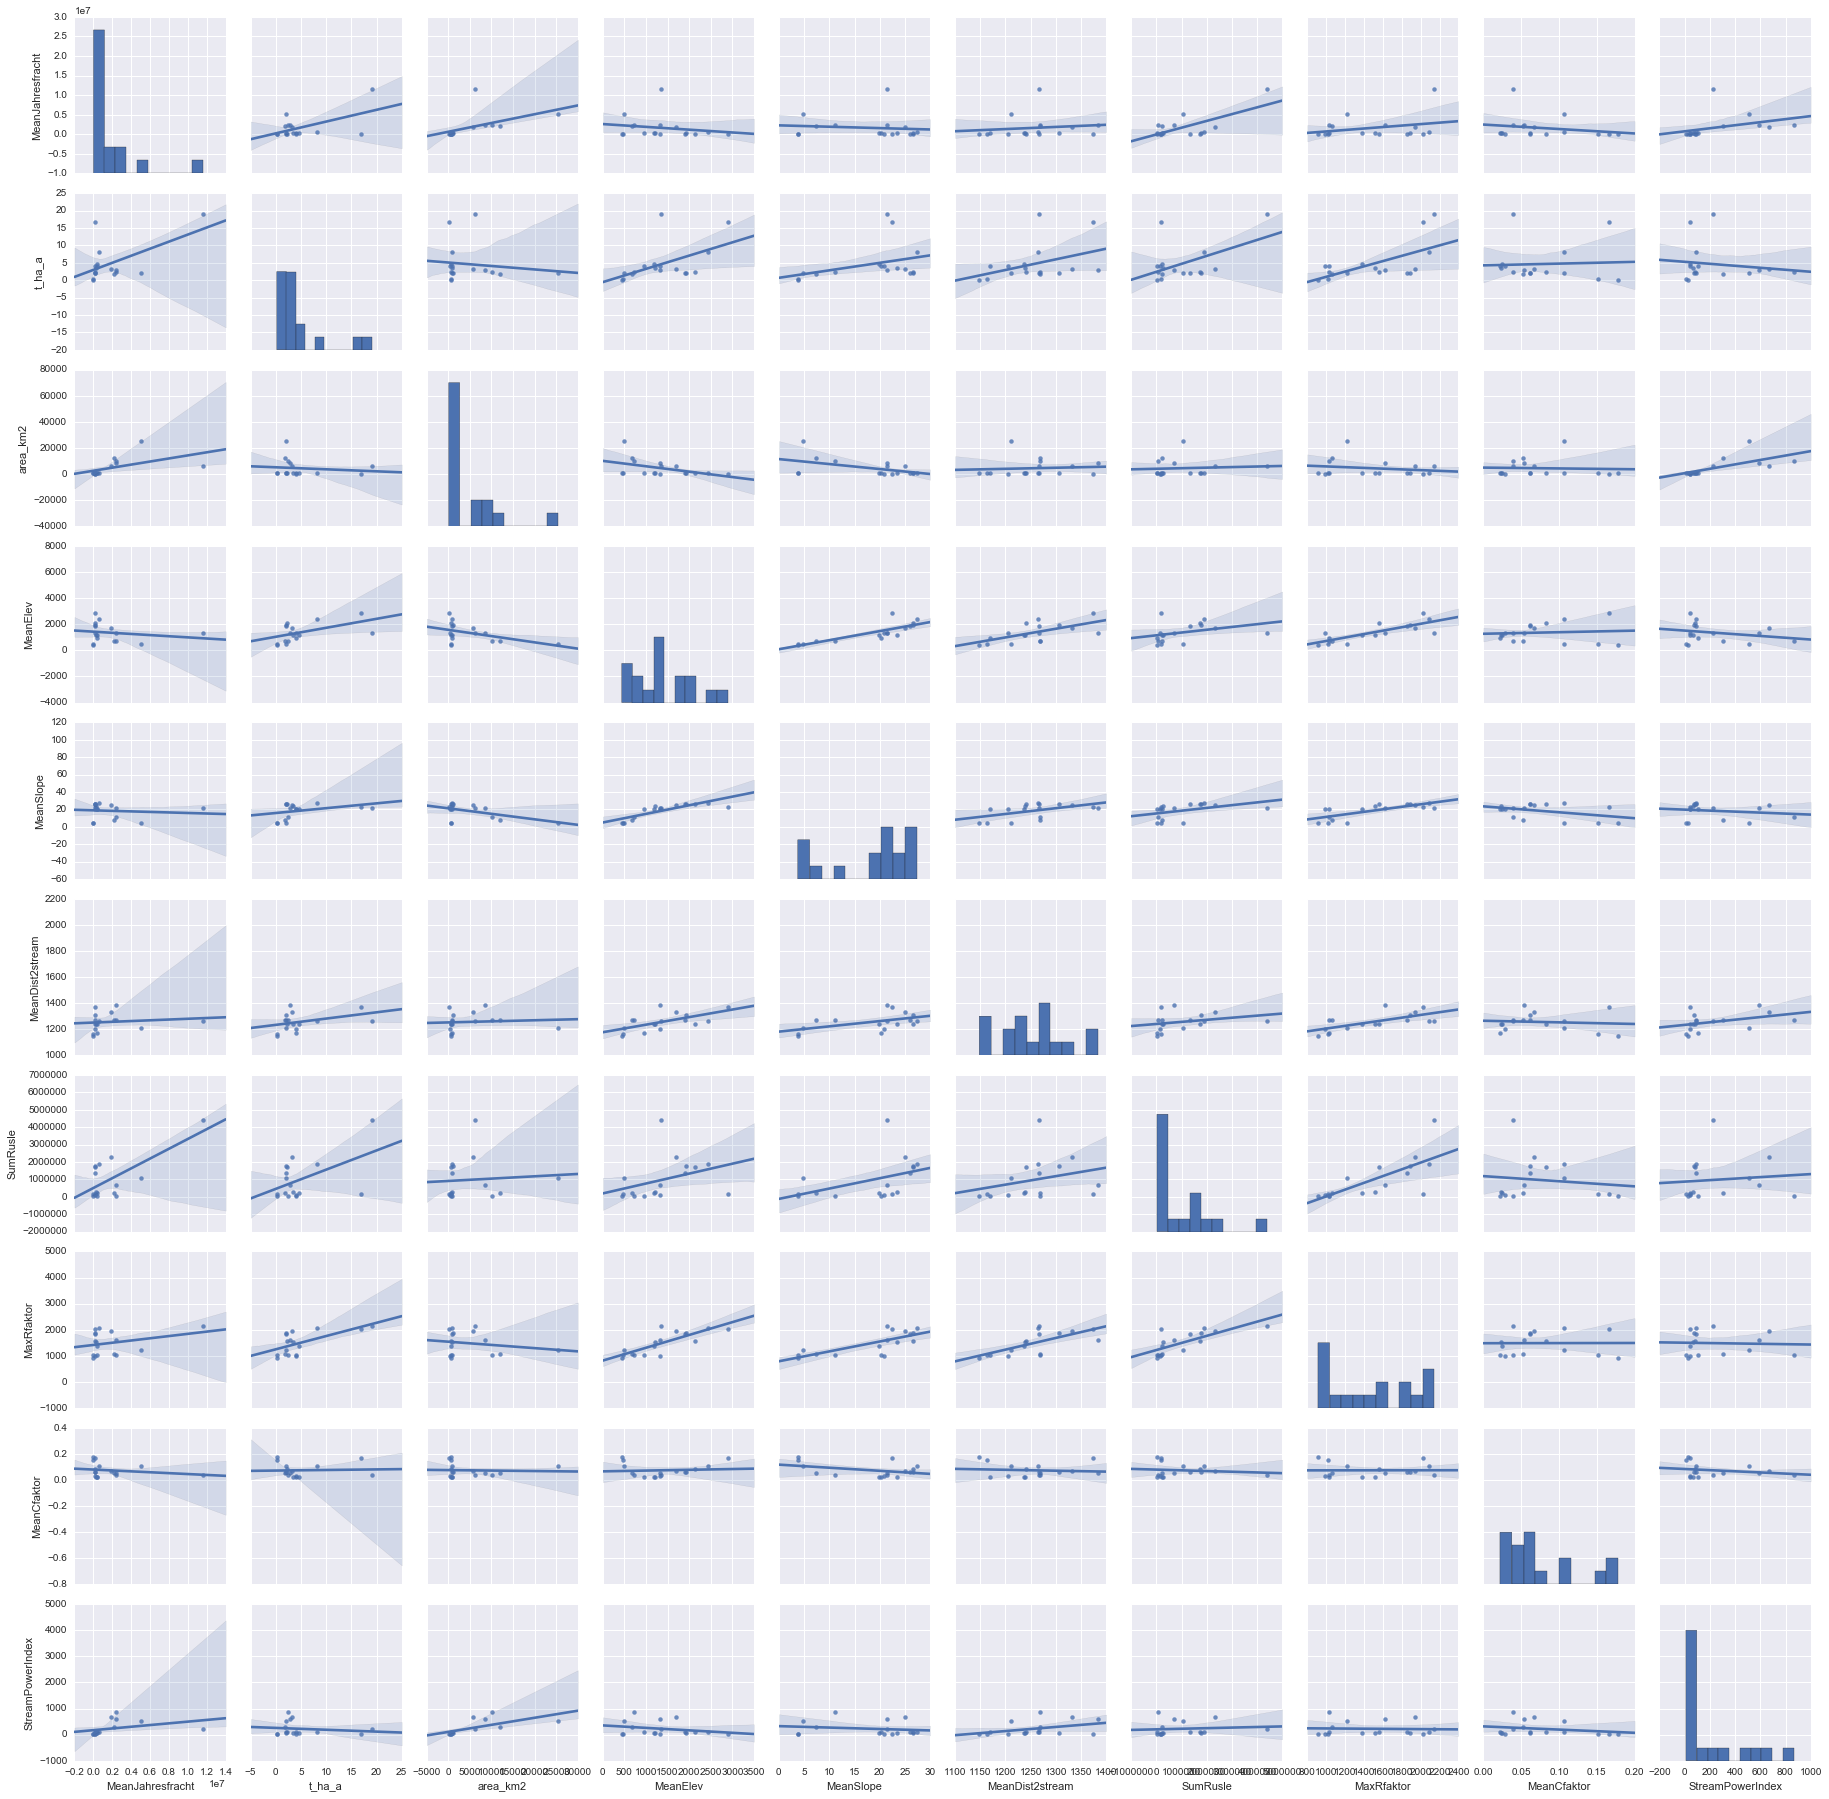

In [45]:
scatterplot_subset = sns.pairplot(scatter_subset, kind='reg')#, hue='geo')
plt.savefig('sns_pairplot_subset.pdf')

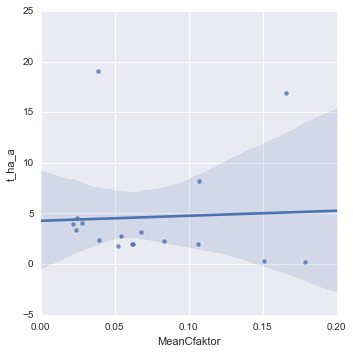

In [41]:
sns.lmplot(x='MeanCfaktor', y='t_ha_a', data=alles_fracht3)#, hue='geo')

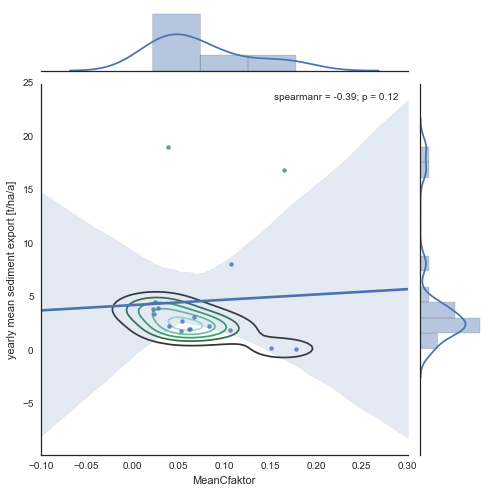

In [66]:
sns.set(style='white', color_codes=True)
g = (sns.jointplot('MeanCfaktor', 't_ha_a', data=alles_fracht3, stat_func=spearmanr,kind='reg', size=7)
     .plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.ylabel('yearly mean sediment export [t/ha/a]')

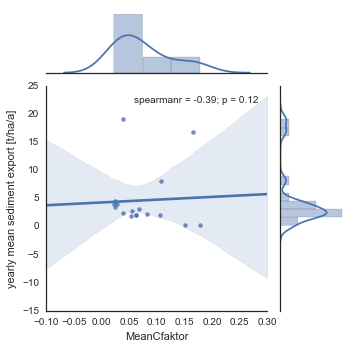

In [63]:
sns.set(style='white', color_codes=True)
g = sns.jointplot('MeanCfaktor', 't_ha_a', data=alles_fracht3, stat_func=spearmanr, kind='reg', size=5, ratio=3)
     #.plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.ylabel('yearly mean sediment export [t/ha/a]')

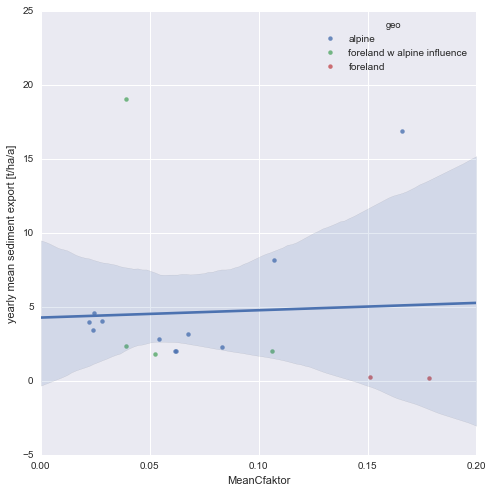

In [136]:
sns.set(style='darkgrid')
t = sns.lmplot(x='MeanCfaktor', y='t_ha_a', hue='geo', data=scatter_subset, legend_out=False,size=7, fit_reg=False)
#sns.jointplot  stat_func=spearmanr, 
sns.regplot(x='MeanCfaktor', y='t_ha_a', data=scatter_subset, scatter=False, ax=t.axes[0,0])
#t.annotate(stats.spearmanr)
#t.fig.text(.5, .5, str(spearmanr(scatter_subset['MeanCfaktor'], scatter_subset['t_ha_a'])), ha ='left', fontsize = 15)
plt.ylabel('yearly mean sediment export [t/ha/a]')

In [142]:
scatter_subset

,geo,MeanJahresfracht,t_ha_a,area_km2,MeanElev,MeanSlope,MeanDist2stream,SumRusle,MaxRfaktor,MeanCfaktor,StreamPowerIndex
SOURCE,,,,,,,,,,,
landeck_br2_ezg,alpine,1.660114e+05,2.283723,726.933125,2123.673242,26.627967,1239.873044,1.735250e+06,1560.926270,0.083019,84.299729
vent_pegel_ezg,alpine,1.630103e+05,16.880454,96.567500,2887.428578,22.489512,1373.001479,1.920052e+05,2022.085083,0.165619,38.360710
tumpen_ezg,alpine,6.384907e+05,8.161725,782.298750,2424.337855,27.383050,1265.135122,1.900693e+06,2084.063477,0.106851,93.391776
innsinn_ezg,alpine,1.836895e+06,3.184814,5767.666875,1705.586437,24.993953,1332.470248,2.315427e+06,1943.434326,0.067400,669.999918
innsreich_ezg,alpine,1.713832e+05,2.024124,846.703125,1897.836713,26.084500,1267.542123,1.352595e+06,1852.067383,0.062262,90.101296
hartzill_ezg,alpine,2.187837e+05,2.014048,1086.288750,1920.645564,26.668147,1306.333751,1.760079e+06,1884.060791,0.061827,74.166629
bruckh_ezg,alpine,1.275201e+05,4.033046,316.188125,1330.509948,20.816758,1205.207540,1.353837e+05,988.054138,0.028186,41.783799
rattenb_ezg,alpine,2.399558e+06,2.828212,8484.363125,1331.785201,21.456309,1383.219354,6.828898e+05,1623.069824,0.054290,590.411857
rosenheim_ezg,foreland w alpine influence,2.392264e+06,2.354858,10158.848130,714.264693,11.094576,1267.881777,7.824836e+04,1028.585083,0.039261,866.313750


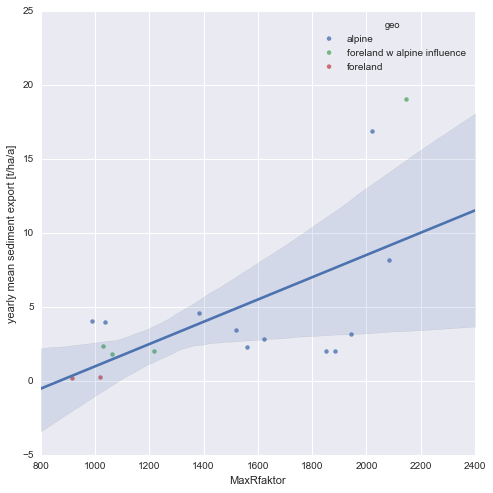

In [143]:
sns.set(style='darkgrid')
t = sns.lmplot(x='MaxRfaktor', y='t_ha_a', hue='geo', data=scatter_subset, legend_out=False,size=7, fit_reg=False)
#sns.jointplot  stat_func=spearmanr, 
sns.regplot(x='MaxRfaktor', y='t_ha_a', data=scatter_subset, scatter=False, ax=t.axes[0,0])
#t.annotate(stats.spearmanr)
#t.fig.text(.5, .5, str(spearmanr(scatter_subset['MeanCfaktor'], scatter_subset['t_ha_a'])), ha ='left', fontsize = 15)
plt.ylabel('yearly mean sediment export [t/ha/a]')